# Baseline 구축

library 호출

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib

In [2]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False

In [3]:
import sys
mod = sys.modules[__name__]

read dataset by "Morning Star"

command) conda install pandas-datareader

In [4]:
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader as web

In [5]:
from datetime import datetime

start = datetime(2018,1,1)
end = datetime(2018,4,5)
f = web.DataReader("F", 'morningstar', start, end)

In [6]:
f.head()

Close   High    Low   Open    Volume
Symbol Date                                            
F      2018-01-01  12.49  12.49  12.49  12.49         0
       2018-01-02  12.66  12.66  12.50  12.52  20773320
       2018-01-03  12.76  12.80  12.67  12.68  29765638
       2018-01-04  12.98  13.04  12.77  12.78  37478200
       2018-01-05  13.20  13.22  13.04  13.06  46121873

# -------------------------------------

In [21]:
web.mstar.daily.MorningstarDailyReader("F", start, end)

In [22]:
f = web.DataReader("AAPL", 'morningstar', start, end)

http://krx.co.kr/por_kor/popup/JHPKOR13008.jsp

In [26]:
from bs4 import BeautifulSoup

In [29]:
pd.__version__

'0.23.1'

In [30]:
web.__version__

'0.6.0'

In [31]:
f1 = web.DataReader("XKRX:005930", 'morningstar', start, end)

In [33]:
f1.head()

Close   High    Low   Open    Volume
Symbol      Date                                            
XKRX:005930 2018-01-01  50960  50960  50960  50960         0
            2018-01-02  51020  51400  50780  51380   8474250
            2018-01-03  51620  52560  51420  52540  10013500
            2018-01-04  51080  52180  50640  52120  11695450
            2018-01-05  52120  52120  51200  51300   9481150

In [35]:
df = web.DataReader(['AAPL', 'XKRX:005930'], 'morningstar', '2017-01-01', '2017-12-30')

In [36]:
df.unstack(level=0).head()

Close                  High                 Low              \
Symbol        AAPL XKRX:005930      AAPL XKRX:005930    AAPL XKRX:005930   
Date                                                                       
2017-01-02  115.82     36100.0  115.8200     36240.0  115.82     35880.0   
2017-01-03  116.15     36480.0  116.3300     36620.0  114.76     36020.0   
2017-01-04  116.02     36160.0  116.5100     36520.0  115.75     36100.0   
2017-01-05  116.61     35560.0  116.8642     36060.0  115.81     35540.0   
2017-01-06  117.91     36200.0  118.1600     36440.0  116.47     36040.0   

              Open                Volume              
Symbol        AAPL XKRX:005930      AAPL XKRX:005930  
Date                                                  
2017-01-02  115.82     35980.0         0     4650600  
2017-01-03  115.80     36280.0  28781865     7357650  
2017-01-04  115.85     36500.0  21118116     7971750  
2017-01-05  115.92     36060.0  22193587    10967450  
2017-01-06  116.78     36180.0  31751900     8880950

In [37]:
df.head()

Close      High     Low    Open    Volume
Symbol Date                                                  
AAPL   2017-01-02  115.82  115.8200  115.82  115.82         0
       2017-01-03  116.15  116.3300  114.76  115.80  28781865
       2017-01-04  116.02  116.5100  115.75  115.85  21118116
       2017-01-05  116.61  116.8642  115.81  115.92  22193587
       2017-01-06  117.91  118.1600  116.47  116.78  31751900

In [38]:
plt.rcParams["figure.figsize"] = (14,6)
plt.rcParams["axes.grid"] = True

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000018E68A2FD68>,
      dtype=object)

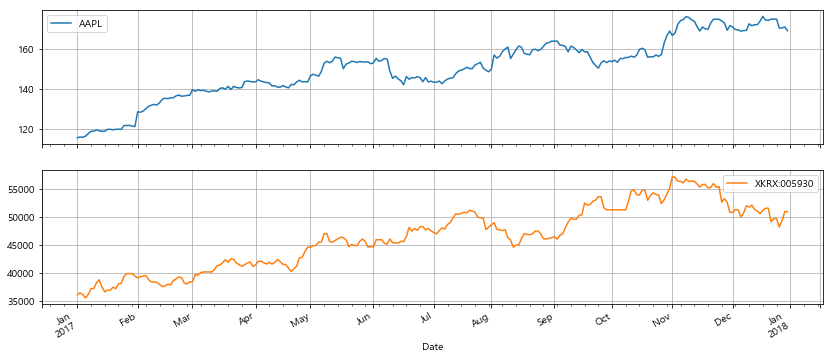

In [39]:
df.unstack(level=0)['Close'].plot(subplots=True)

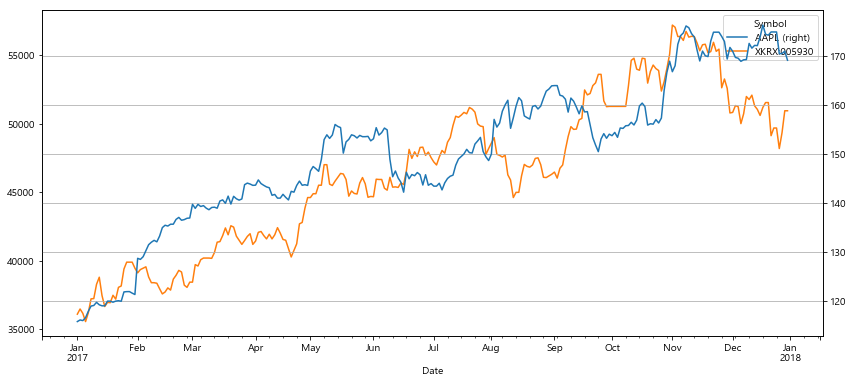

In [42]:
df.unstack(level=0)['Close'].plot(secondary_y='AAPL')

# -------------------------------

In [7]:
test = pd.read_html('http://kind.krx.co.kr/corpgeneral/corpList.do?method=download&searchType=13', header=0)[0]
test.head()

,회사명,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
0,CJ,1040,기타 금융업,지주회사,1973-06-29,12월,"손경식, 이재현, 이채욱",http://www.cj.net,서울특별시
1,HDC,12630,건물 건설업,"토목공사,건축공사,아파트분양사업,재개발/재건축사업",1996-10-16,12월,정몽규,http://www.i-park.com,서울특별시
2,HSD엔진,82740,일반 목적용 기계 제조업,"대형선박용엔진,내연발전엔진",2011-01-04,12월,고영열,http://www.doosanengine.com,경상남도
3,KG케미칼,1390,기초 화학물질 제조업,"콘크리트혼화제, 비료, 친환경농자재, 수처리제",1989-08-25,12월,김경묵,http://www.kgchem.co.kr,울산광역시
4,LG이노텍,11070,전자부품 제조업,기타 전자부품 제조업,2008-07-24,12월,박종석,http://www.lginnotek.co.kr,서울특별시


In [44]:
test.종목코드 = test.종목코드.map('{:06d}'.format)
test.종목코드.head()

0    001040
1    012630
2    082740
3    001390
4    011070
Name: 종목코드, dtype: object

In [8]:
import urllib.parse
import pandas as pd

MARKET_CODE_DICT = {
    'kospi': 'stockMkt',
    'kosdaq': 'kosdaqMkt',
    'konex': 'konexMkt'
}

DOWNLOAD_URL = 'kind.krx.co.kr/corpgeneral/corpList.do'

def download_stock_codes(market=None, delisted=False):
    params = {'method': 'download'}

    if market.lower() in MARKET_CODE_DICT:
        params['marketType'] = MARKET_CODE_DICT[market]

    if not delisted:
        params['searchType'] = 13

    params_string = urllib.parse.urlencode(params)
    request_url = urllib.parse.urlunsplit(['http', DOWNLOAD_URL, '', params_string, ''])

    test = pd.read_html(request_url, header=0)[0]
    test.종목코드 = test.종목코드.map('{:06d}'.format)

    return test

In [9]:
kospi = download_stock_codes("kospi")
kospi.head()

,회사명,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
0,CJ,001040,기타 금융업,지주회사,1973-06-29,12월,"손경식, 이재현, 이채욱",http://www.cj.net,서울특별시
1,HDC,012630,건물 건설업,"토목공사,건축공사,아파트분양사업,재개발/재건축사업",1996-10-16,12월,정몽규,http://www.i-park.com,서울특별시
2,HSD엔진,082740,일반 목적용 기계 제조업,"대형선박용엔진,내연발전엔진",2011-01-04,12월,고영열,http://www.doosanengine.com,경상남도
3,KG케미칼,001390,기초 화학물질 제조업,"콘크리트혼화제, 비료, 친환경농자재, 수처리제",1989-08-25,12월,김경묵,http://www.kgchem.co.kr,울산광역시
4,LG이노텍,011070,전자부품 제조업,기타 전자부품 제조업,2008-07-24,12월,박종석,http://www.lginnotek.co.kr,서울특별시


In [52]:
results = {}
for code in kospi.종목코드:
    results[code] = web.DataReader("KRX:"+code, 'morningstar', start, end)

df = pd.concat(results, axis=1)
df.loc[:, pd.IndexSlice[:, 'Adj Close']].tail()

KeyboardInterrupt: 

In [16]:
code_li = list(map(lambda x : "XKRX:"+x, kospi.종목코드))
code_li[:5]

['XKRX:001040', 'XKRX:012630', 'XKRX:082740', 'XKRX:001390', 'XKRX:011070']

In [31]:
from pattern3.web import URL
for stock in code_li:
    webpage = "http://financials.morningstar.com/ajax/exportKR2CSV.html?t=%s&culture=en-CA&region=USA&order=asc&r=314562"%stock
    url = URL(webpage)
    f = open('%s_keyratios.csv'%stock, 'wb', encoding = "utf-8")
    url = url.encode()
    f.write(url.download())
    f.close()

ValueError: binary mode doesn't take an encoding argument

In [26]:
import urllib.request as url
from bs4 import BeautifulSoup
for stock in code_li:
    urls = "http://financials.morningstar.com/ajax/exportKR2CSV.html?t=%s&culture=en-CA&region=USA&order=asc&r=314562"%stock
    data = url.urlopen(urls).read()
    bs = BeautifulSoup(data)
    
    ingreds = bs.find('div', {'class': 'ingredients'})
    ingreds = [s.getText().strip() for s in ingreds.findAll('li')]
        
    f = open('%s_keyratios.csv'%stock, 'wb')
    f.write('\n'.join(ingreds))
    f.close()

AttributeError: 'NoneType' object has no attribute 'findAll'